In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = dataset.iloc[:,2:-1].values
y = dataset.iloc[:,-1].values

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [5]:
sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

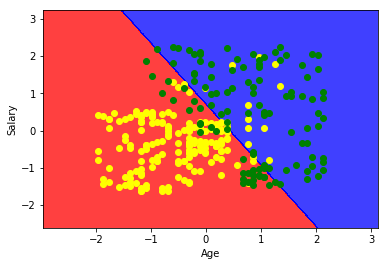

In [7]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01),
                    np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() + 1, step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','blue')))

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c = ListedColormap(('yellow','green'))(i), label=j)
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.xlabel('Age')
plt.ylabel('Salary')